# Practical analysis of advanced algorithms

In [14]:
import time
import math
import random
import pandas as pd
import plotly.express as px
from IPython.display import Image

## Huffman algorithm

In [36]:
class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq  
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''
        
        
def huffman(sym_freq):
    nodes = []
    for s, f in sym_freq:
        nodes.append(Node(f, s))

    while len(nodes) > 1:
        nodes = sorted(nodes, key=lambda x: x.freq)
        left = nodes[0]
        right = nodes[1]
        left.huff = 0
        right.huff = 1
        newNode = node(left.freq + right.freq, left.symbol + right.symbol, left, right)
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
    return nodes[0]

In [65]:
def run_algorithm(alg_name, dimension=2000, runs=5):
    dimensions = [i + 1 for i in range(dimension)]
    durations = [0 for i in range(dimension)]
    algorithms = {"huffman": huffman}
    action = algorithms[alg_name]

    for run in range(runs):
        print(f"Run: {run + 1}")
        for n in range(1, dimension + 1):
#             sym_freq = [(str(k), k) for k in range(n)]
            sym_freq = [(str(k), 1) for k in range(n)]
#             sym_freq = [(str(k), random.randint(1, dimension)) for k in range(n)]
            start_time = time.time()
            action(sym_freq)
            end_time = time.time()
            durations[n - 1] += round(end_time - start_time, 6)
    
    durations = [round(x/runs, 6) for x in durations]
    return dimensions, durations, action.__name__

In [37]:
def visualization(dimensions, durations_emp, durations_th, function_name):
    dict_df = {
        "dimension": dimensions,
        "duration": durations_emp,
        "method": ["empirical" for i in range(len(dimensions))]
    }
    dict_df2 = {
        "dimension": dimensions,
        "duration": durations_th,
        "method": ["theoretical" for i in range(len(dimensions))]
    }
    df = pd.DataFrame(dict_df)
    df2 = pd.DataFrame(dict_df2)
    df = df.append(df2)
    fig = px.line(df, x="dimension", y="duration", color='method', title=function_name)
    img_bytes = fig.to_image(format="png", engine="kaleido", width=1200, height=800, scale=1)
    
    return img_bytes


Pre-sorted frequency

Run: 1
Run: 2
Run: 3
Run: 4
Run: 5


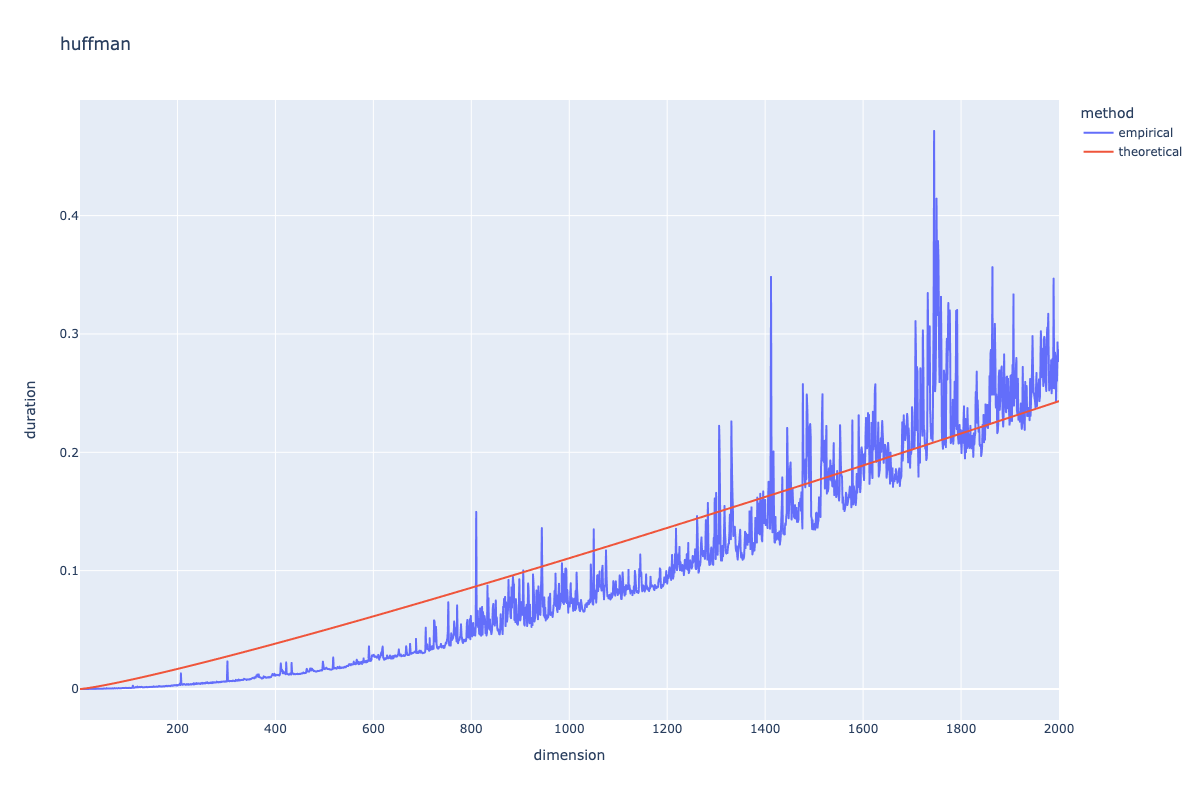

In [45]:
dimensions, durations_emp, title = run_algorithm("huffman")
durations_th = [math.log(dimensions[i]) * dimensions[i] * 0.000016 for i in range(len(dimensions))]
img_bytes = visualization(dimensions, durations_emp, durations_th, title)
Image(img_bytes)

Same frequency

Run: 1
Run: 2
Run: 3
Run: 4
Run: 5


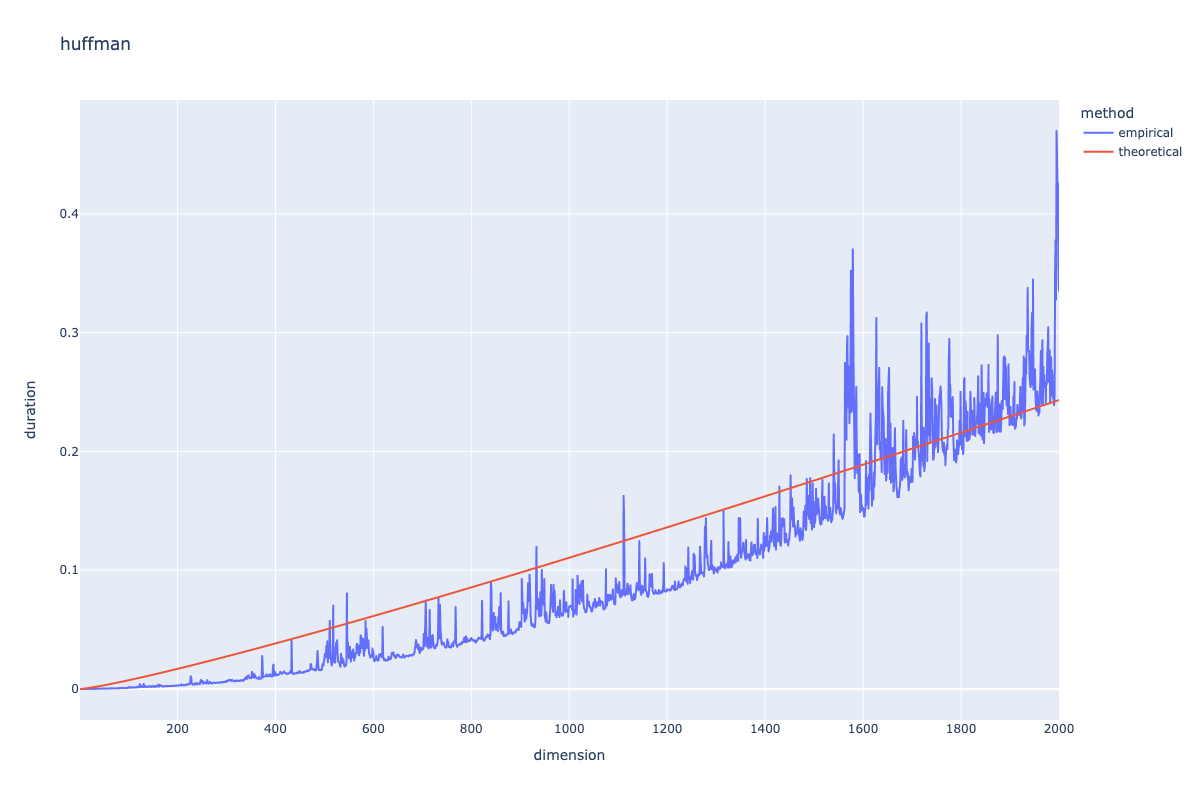

In [66]:
dimensions, durations_emp, title = run_algorithm("huffman")
durations_th = [math.log(dimensions[i]) * dimensions[i] * 0.000016 for i in range(len(dimensions))]
img_bytes = visualization(dimensions, durations_emp, durations_th, title)
Image(img_bytes)

random frequency

Run: 1
Run: 2
Run: 3
Run: 4
Run: 5


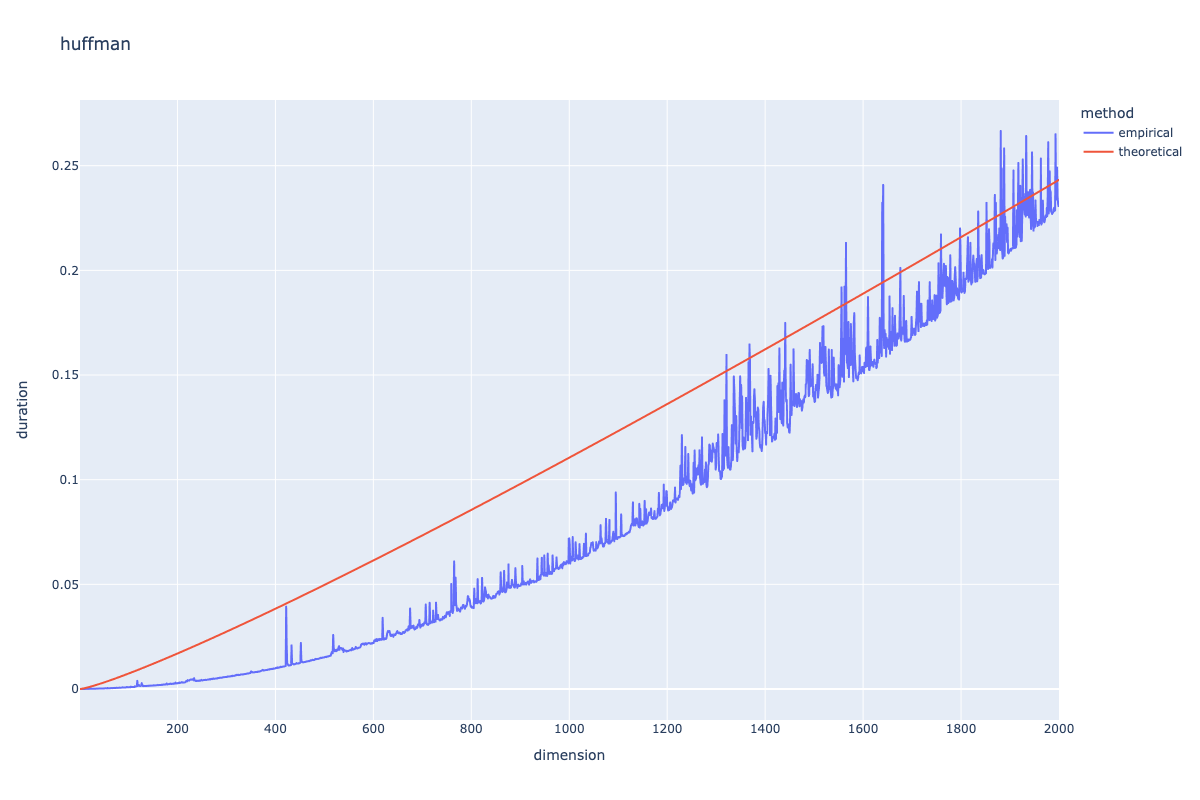

In [63]:
dimensions, durations_emp, title = run_algorithm("huffman")
durations_th = [math.log(dimensions[i]) * dimensions[i] * 0.000016 for i in range(len(dimensions))]
img_bytes = visualization(dimensions, durations_emp, durations_th, title)
Image(img_bytes)

## Rabin Karp algorithm

In [71]:
def rabin_karp(txt, pat, d, q):
    m = len(pat)
    n = len(txt)
    i = 0
    j = 0
    pattern_hash = 0    
    pattern_txt = 0
    h = 1
  
    for i in range(m - 1):
        h = (h * d) % q
  
    for i in range(m):
        pattern_hash = (d * pattern_hash + ord(pat[i])) % q
        pattern_txt = (d * pattern_txt + ord(txt[i])) % q
  
    for i in range(n - m + 1):
        if pattern_hash == pattern_txt:
            for j in range(m):
                if txt[i + j] != pat[j]:
                    break
            j += 1
#             if j == m:
#                 print("Pattern found: " + str(i))
        if i < n - m:
            pattern_txt = (d * (pattern_txt - ord(txt[i]) * h) + ord(txt[i + m])) % q
            if pattern_txt < 0:
                pattern_txt = pattern_txt + q

In [85]:
def run_rabin_karp(alg_name, dimension=2000, runs=5):
    dimensions = [i + 1 for i in range(dimension)]
    durations = [0 for i in range(dimension)]
    
    algorithms = {
        "rabin_karp": rabin_karp
    }
    action = algorithms[alg_name]

    for run in range(runs):
        print(f"Run: {run + 1}")
        for n in range(1, dimension + 1):
            pat = "abcd"
            txt = ""
            for k in range(n):
                txt += pat
            start_time = time.time()
            action(txt, pat, 256, 101)
            end_time = time.time()
            durations[n - 1] += round(end_time - start_time, 6)
    
    durations = [round(x/runs, 6) for x in durations]
    return dimensions, durations, action.__name__

Worse case

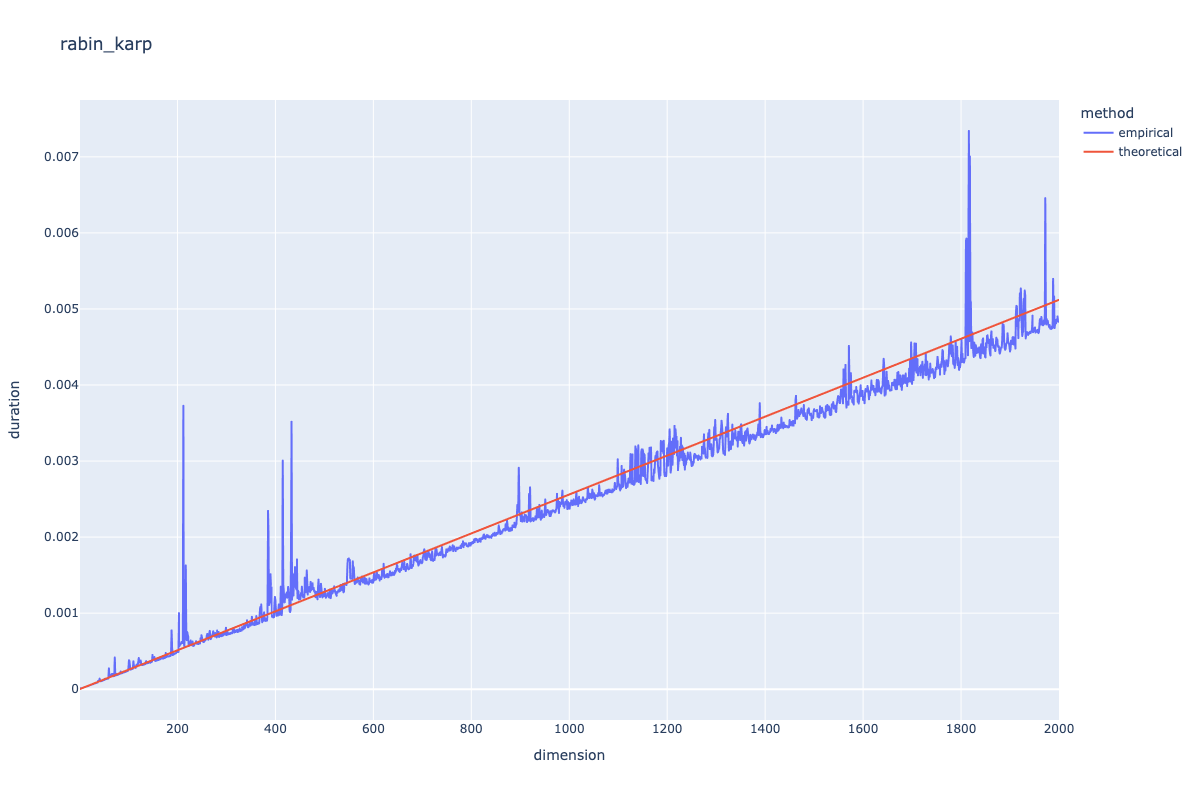

In [83]:
dimensions, durations_emp, title = run_rabin_karp("rabin_karp")
durations_th = [4 * 4 * dimensions[i] * 0.00000016 for i in range(len(dimensions))]
img_bytes = visualization(dimensions, durations_emp, durations_th, title)
Image(img_bytes)